In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from matplotlib import style

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import pickle

import json

### 1.Problem Statement
-Predict medical insurance price/ premium base on independent features

### 2.Data Gathering

In [2]:
df = pd.read_csv("C:\\Users\\vaish\\Downloads\\medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 3.EDA & Visualizations

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.isna().mean() # mssing in %

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [10]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

In [11]:
df['sex']= label_encoder.fit_transform(df['sex']) 
df['smoker']= label_encoder.fit_transform(df['smoker'])

<Axes: ylabel='charges'>

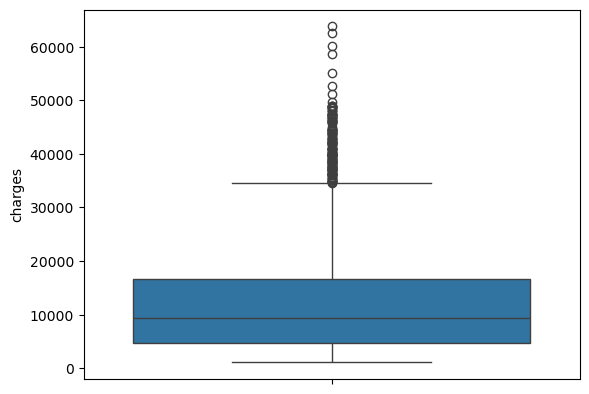

In [12]:
sns.boxplot(df['charges'])

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

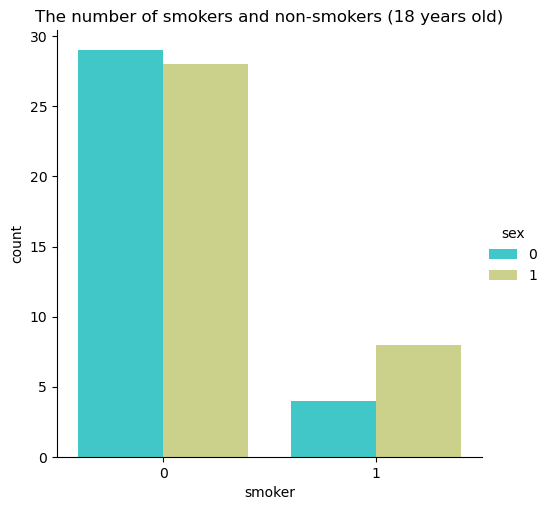

In [13]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=df[(df.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

<Axes: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

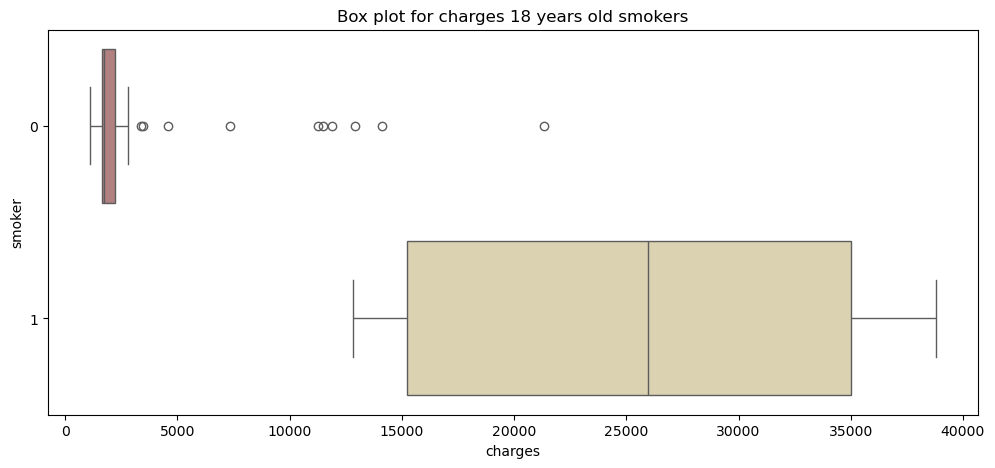

In [14]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 18)] , orient="h", palette = 'pink')

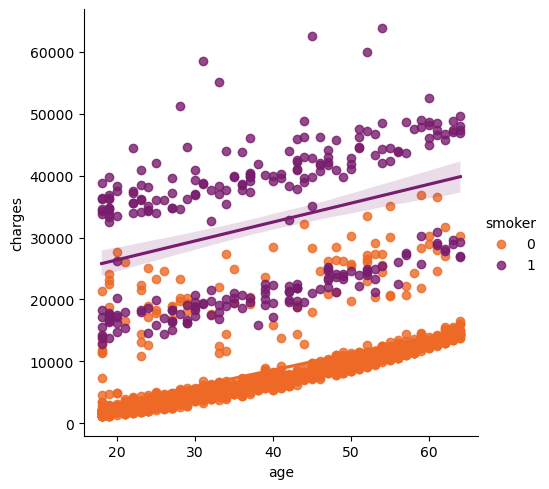

In [15]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'inferno_r')

<Axes: xlabel='charges', ylabel='Count'>

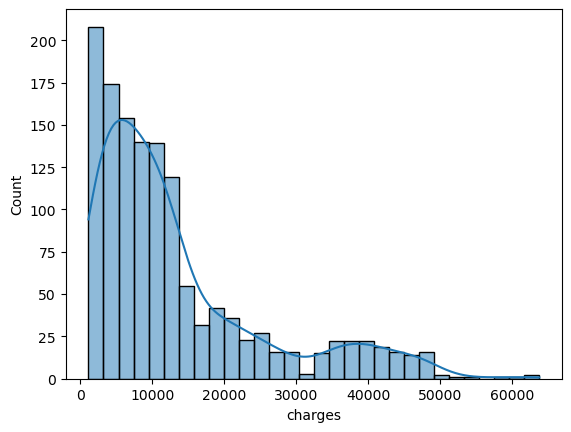

In [16]:
sns.histplot(data=df,x='charges',kde=True)

Text(0.5, 1.0, 'Distribution of Charges')

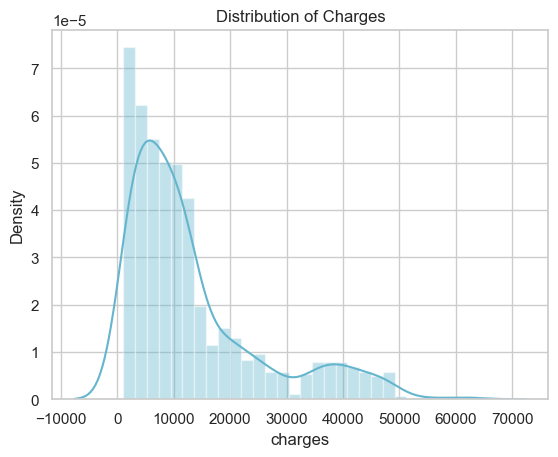

In [17]:
sns.set(style='whitegrid')
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

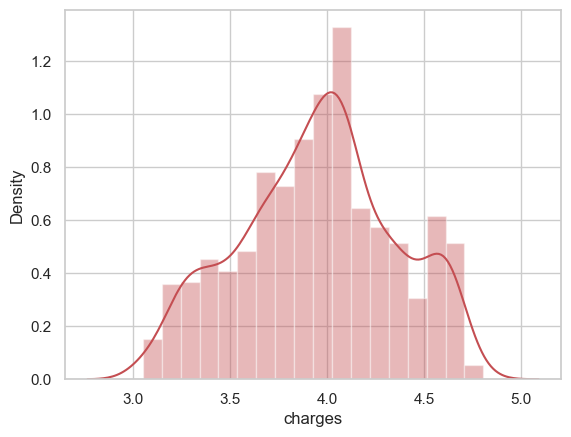

In [18]:
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

In [19]:
charges = df['charges'].groupby(df['region']).sum().sort_values(ascending = True)
charges = charges.head()

<Axes: xlabel='region', ylabel='charges'>

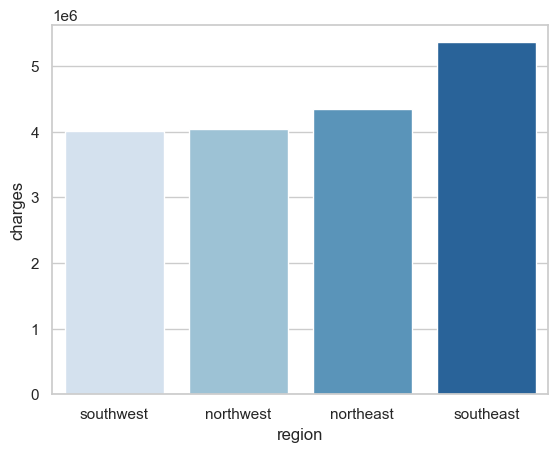

In [20]:
sns.barplot(x=charges.index, y=charges, palette='Blues')

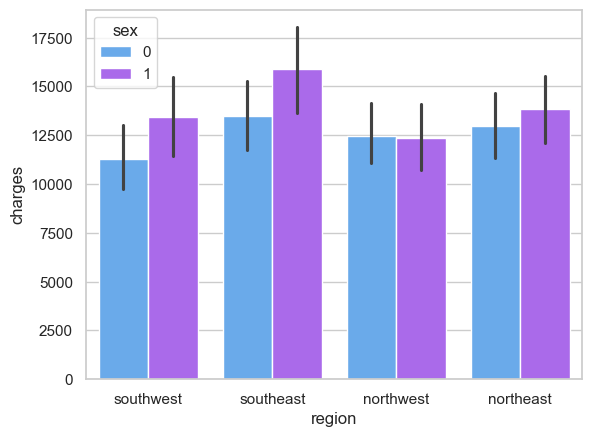

In [21]:
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

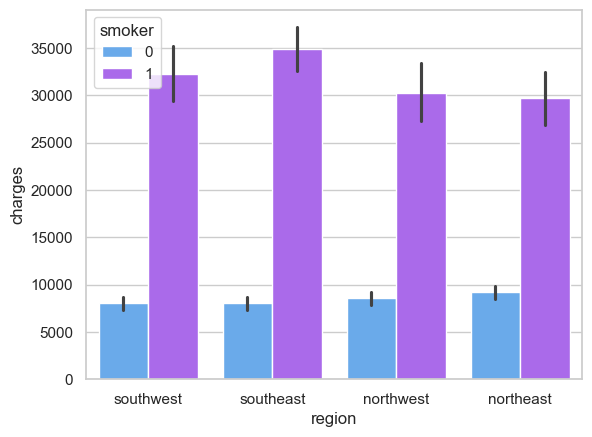

In [22]:
ax = sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='cool')

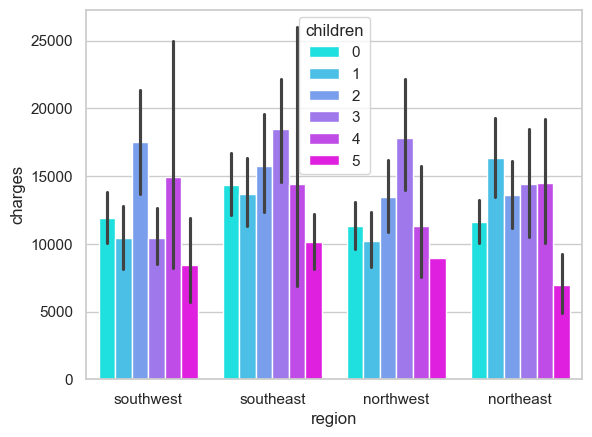

In [23]:
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='cool')

In [24]:
df['region']= label_encoder.fit_transform(df['region']) 

In [25]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


<Axes: >

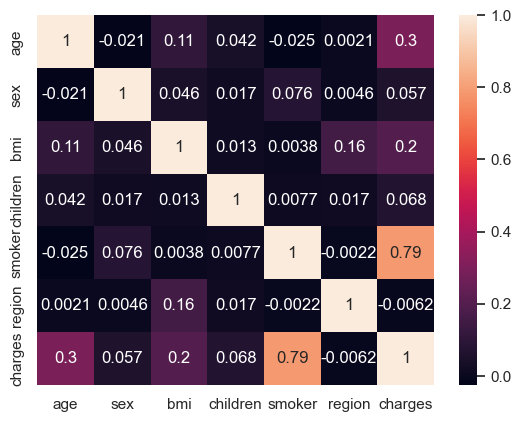

In [26]:
sns.heatmap(df.corr(),annot=True)

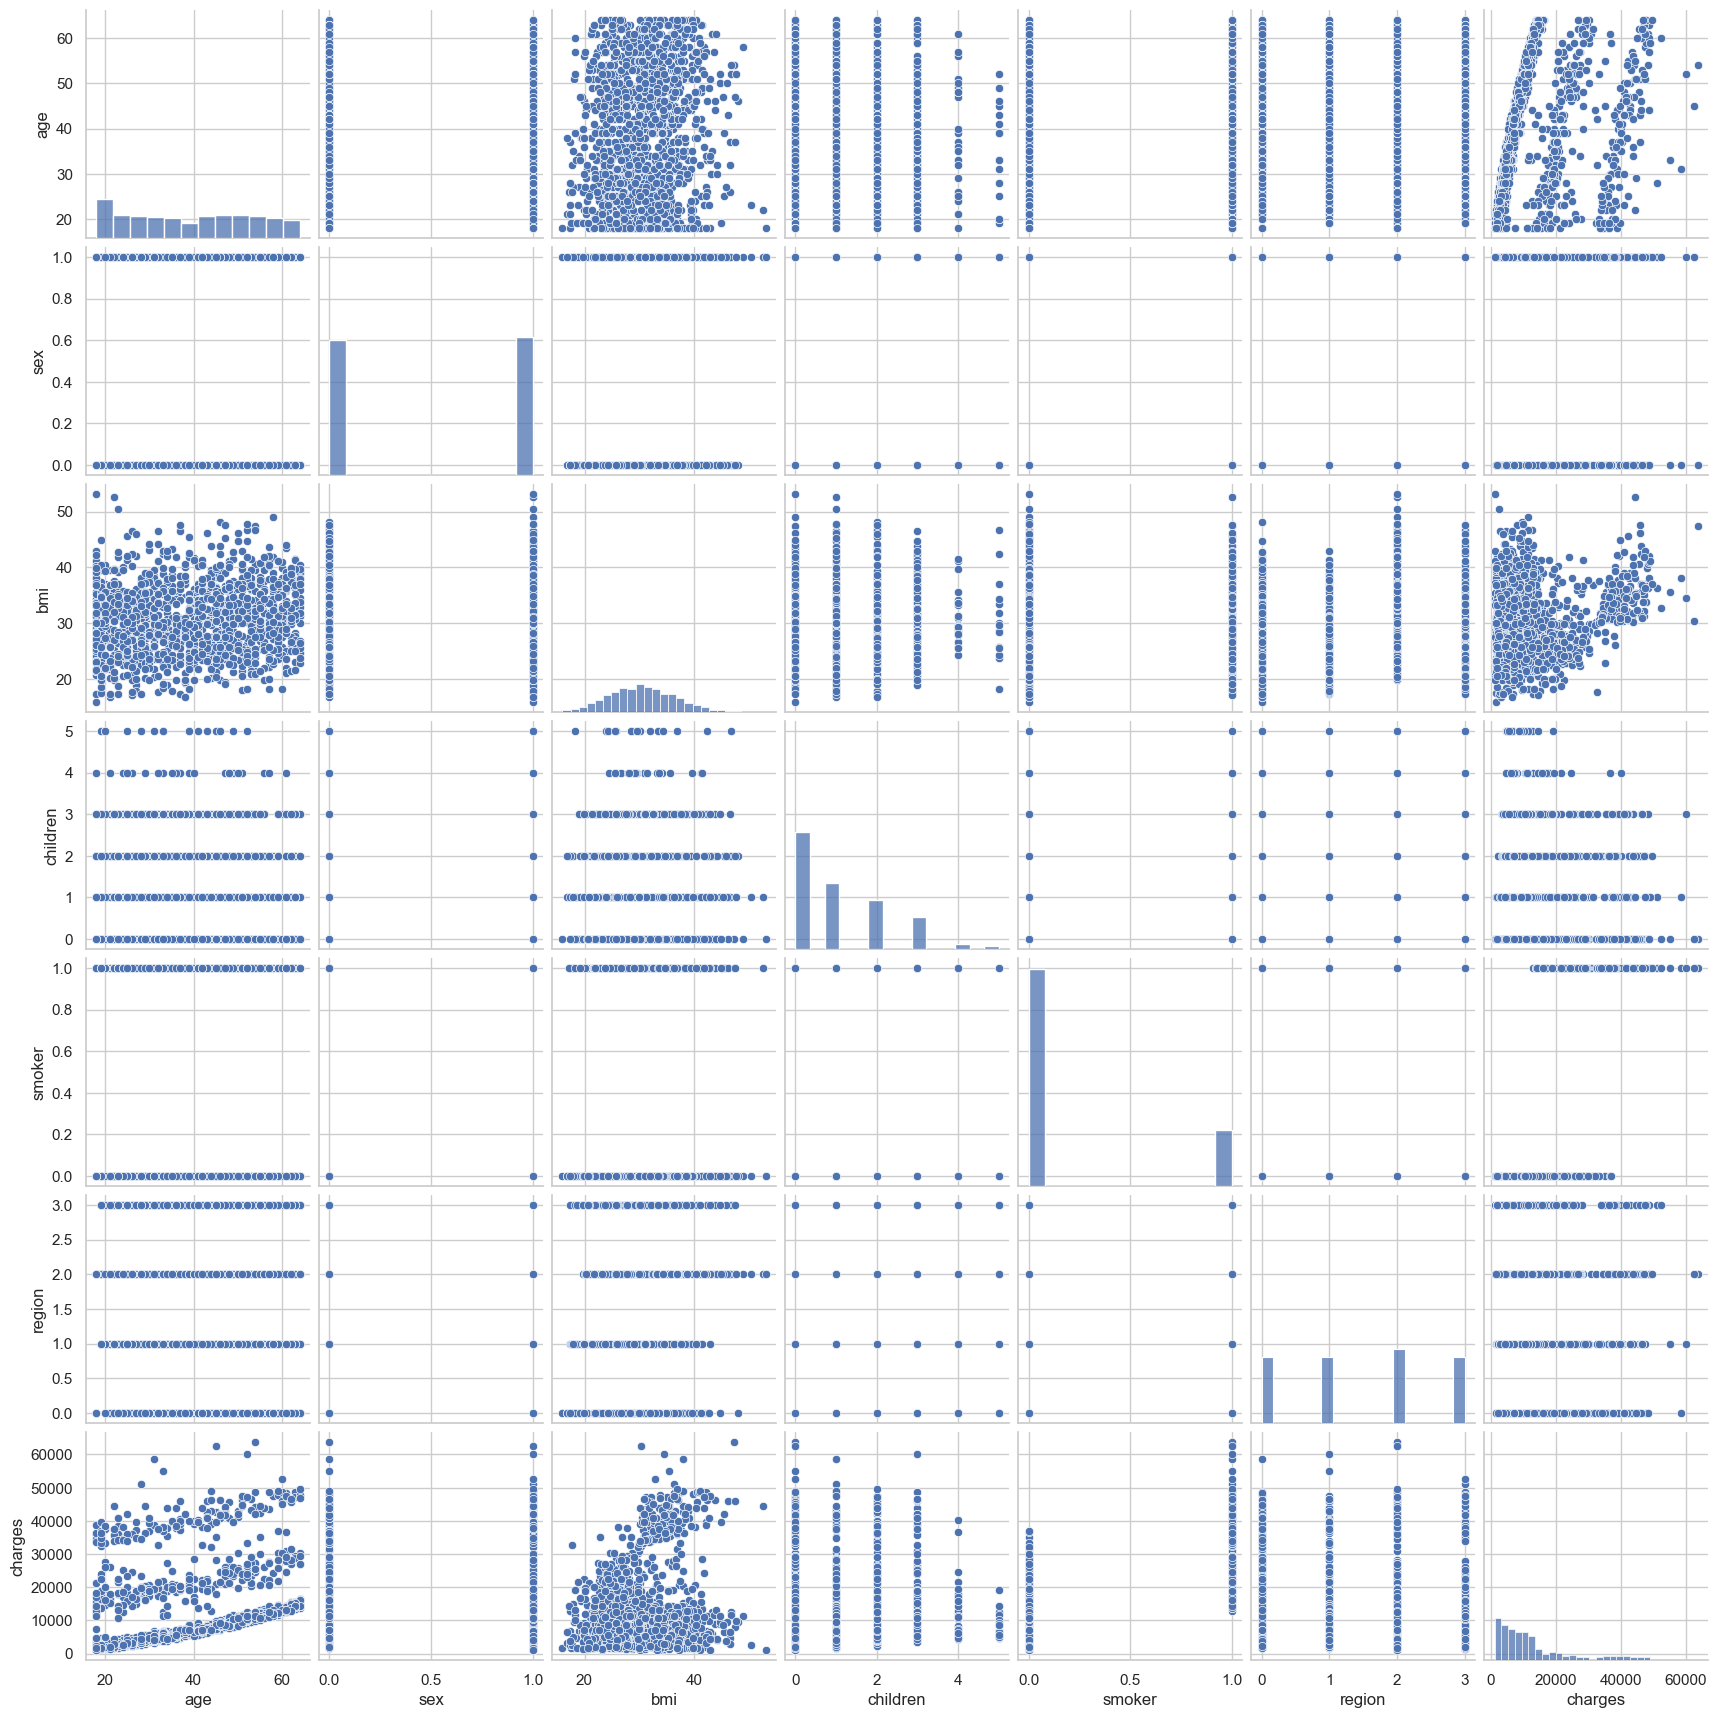

In [27]:
sns.pairplot(df)

In [28]:
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
print(x_train.shape)
print(x_train.columns)

(1070, 6)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


In [30]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

In [31]:
lr = LinearRegression().fit(x_train,y_train)

In [32]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7833463107364538


In [33]:
from sklearn.preprocessing import PolynomialFeatures


X = df.drop(['charges','region'], axis = 1)
Y = df.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147239


### Compare Between Models

In [34]:
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


models = {     
    "LR": LinearRegression(),
    "RF": RandomForestRegressor(n_estimators=100, max_depth=7),
    "DT": DecisionTreeRegressor(),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, max_depth=7),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR()
}

for name, model in models.items():
    print(f'Training Model {name} \n-----------------------------------------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Score is {model.score(x_test, y_test)}')


    # Use appropriate regression metrics
    print(f'Training R-squared: {r2_score(y_train, model.predict(x_train))}')
    print(f'Testing R-squared: {r2_score(y_test, y_pred)}')

    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
    print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')


Training Model LR 
-----------------------------------------------
Score is 0.7833463107364538
Training R-squared: 0.7417049283233981
Testing R-squared: 0.7833463107364538
Mean Squared Error: 33635210.43117841
Mean Absolute Error: 4186.508898366434
Training Model RF 
-----------------------------------------------
Score is 0.8715321320183632
Training R-squared: 0.926792158053169
Testing R-squared: 0.8715321320183632
Mean Squared Error: 19944473.541601736
Mean Absolute Error: 2476.7496180300577
Training Model DT 
-----------------------------------------------
Score is 0.725920577531594
Training R-squared: 0.9983078124756305
Testing R-squared: 0.725920577531594
Mean Squared Error: 42550482.666217916
Mean Absolute Error: 3017.2173869626868
Training Model GradientBoosting 
-----------------------------------------------
Score is 0.8426428960812726
Training R-squared: 0.9927812965590004
Testing R-squared: 0.8426428960812726
Mean Squared Error: 24429490.774601612
Mean Absolute Error: 2597.4

- The best is RandomForestRegressor

### Now We Go To Choose Max Depth

In [36]:
max_depth_values = [1,2,3,4,5,6,7,8]
train_accuracy_values =[]
for max_depth_val in max_depth_values:
    model = RandomForestRegressor(max_depth=max_depth_val,random_state = 2)
    model.fit(x_train, y_train)
    y_pred =model.predict(x_train)
    acc_train=model.score(x_test,y_test) 
    train_accuracy_values.append(acc_train)

In [37]:
train_accuracy_values

[0.6608048922770777,
 0.8417933495550463,
 0.8675746825596274,
 0.872677170478934,
 0.8753239247794342,
 0.8755309603734038,
 0.8729311378096285,
 0.8711685231482463]

In [38]:
final_model = RandomForestRegressor(max_depth=6,random_state = 0)
final_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, random_state=0)

### Model Evalulation

In [39]:
forest_train_pred = final_model.predict(x_train)
forest_test_pred = final_model.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 13740918.931, MSE test data: 19845744.977
R2 train data: 0.905, R2 test data: 0.872


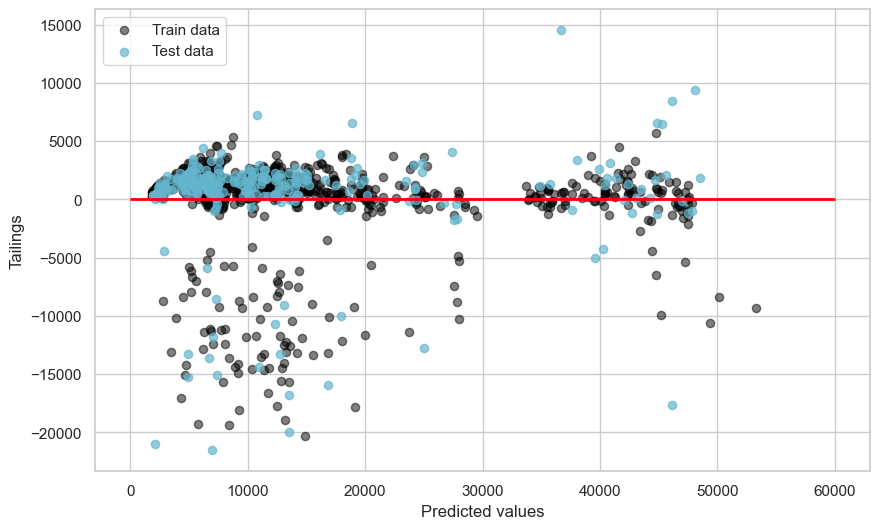

In [40]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

### Try LinearRegression & PolynomialFeatures

In [41]:
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7833463107364538


In [42]:
from sklearn.preprocessing import PolynomialFeatures


X = df.drop(['charges','region'], axis = 1)
Y = df.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147239


In [43]:
final_model.feature_importances_

array([0.12308796, 0.00169572, 0.18776957, 0.01312622, 0.66872927,
       0.00559125])

In [44]:
with open("final_model.pkl","wb") as file:
    pickle.dump(final_model,file)

In [45]:
project_data={"columns": list(x.columns)}
project_data

{'columns': ['age', 'sex', 'bmi', 'children', 'smoker', 'region']}

In [46]:
with open("project_data.json","w") as file:
    json.dump(project_data,file)